## Preprocessing

In [41]:
!pip install autokeras
!pip install skfeature-chappers

# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("https://static.bc-edx.com/data/dl-1-2/m21/lms/starter/charity_data.csv")
application_df.head()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [42]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df= application_df.drop(["EIN", "NAME"], axis=1)
application_df.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [43]:
# Determine the number of unique values in each column.
application_df.nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [44]:
# Look at APPLICATION_TYPE value counts for binning
application_counts = application_df.APPLICATION_TYPE.value_counts()
application_counts

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

In [45]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
cutoff = 500
application_types_to_replace = application_counts[application_counts < cutoff].index.tolist()

# Replace in dataframe
for app in application_types_to_replace:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure binning was successful
application_df['APPLICATION_TYPE'].value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [46]:
# Look at CLASSIFICATION value counts for binning
classification_counts = application_df.CLASSIFICATION.value_counts()
classification_counts

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

In [47]:
# You may find it helpful to look at CLASSIFICATION value counts >1
useful_classification_counts= classification_counts[classification_counts>1]
useful_classification_counts

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
C2800       95
C7100       75
C1300       58
C1280       50
C1230       36
C1400       34
C7200       32
C2300       32
C1240       30
C8000       20
C7120       18
C1500       16
C1800       15
C6000       15
C1250       14
C8200       11
C1238       10
C1278       10
C1235        9
C1237        9
C7210        7
C2400        6
C1720        6
C4100        6
C1257        5
C1600        5
C1260        3
C2710        3
C0           3
C3200        2
C1234        2
C1246        2
C1267        2
C1256        2
Name: CLASSIFICATION, dtype: int64

In [48]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
cutoff = 1000
classifications_to_replace = classification_counts[classification_counts < cutoff].index.tolist()

# Replace in dataframe
for cls in classifications_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls,"Other")
    
# Check to make sure binning was successful
application_df['CLASSIFICATION'].value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [49]:
# Convert categorical data to numeric with `pd.get_dummies`
application_df = pd.get_dummies(application_df)
application_df.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,108590,1,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
2,1,5000,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,1,6692,1,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4,1,142590,1,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [50]:
# Split our preprocessed data into our features and target arrays
y = application_df["IS_SUCCESSFUL"].values
X = application_df.drop(["IS_SUCCESSFUL"],1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)

<ipython-input-50-c3085675472e>:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = application_df.drop(["IS_SUCCESSFUL"],1).values


In [51]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Compile, Train and Evaluate the Model

In [52]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.


nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=80, activation="relu", input_dim=43))


# Second hidden layer
nn.add(tf.keras.layers.Dense(units=30, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 80)                3520      
                                                                 
 dense_12 (Dense)            (None, 30)                2430      
                                                                 
 dense_13 (Dense)            (None, 1)                 31        
                                                                 
Total params: 5,981
Trainable params: 5,981
Non-trainable params: 0
_________________________________________________________________


In [53]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [54]:
# Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
804/804 [==============================] - 4s 3ms/step - loss: 0.5706 - accuracy: 0.7205
Epoch 2/100
804/804 [==============================] - 3s 4ms/step - loss: 0.5545 - accuracy: 0.7282
Epoch 3/100
804/804 [==============================] - 4s 5ms/step - loss: 0.5512 - accuracy: 0.7306
Epoch 4/100
804/804 [==============================] - 2s 3ms/step - loss: 0.5493 - accuracy: 0.7310
Epoch 5/100
804/804 [==============================] - 3s 4ms/step - loss: 0.5487 - accuracy: 0.7318
Epoch 6/100
804/804 [==============================] - 3s 4ms/step - loss: 0.5466 - accuracy: 0.7341
Epoch 7/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5464 - accuracy: 0.7339
Epoch 8/100
804/804 [==============================] - 2s 3ms/step - loss: 0.5461 - accuracy: 0.7333
Epoch 9/100
804/804 [==============================] - 2s 3ms/step - loss: 0.5452 - accuracy: 0.7356
Epoch 10/100
804/804 [==============================] - 2s 3ms/step - loss: 0.5452 - accura

In [56]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5616 - accuracy: 0.7294 - 446ms/epoch - 2ms/step
Loss: 0.5616000890731812, Accuracy: 0.7294460535049438


In [57]:
# Export our model to HDF5 file
nn.save("AlphabetSoupCharity.h5")

#Optimization Attempt #1

In [58]:
#Chi test
from sklearn.feature_selection import chi2

f_score, p_values= chi2(X_train, y_train)
p_values

array([9.95984307e-001, 0.00000000e+000, 2.11196826e-012, 8.65051301e-046,
       3.78275374e-086, 8.10345290e-001, 6.60272261e-050, 6.50711884e-049,
       1.84309235e-037, 2.20008731e-001, 9.49531457e-009, 0.00000000e+000,
       7.75345348e-001, 0.00000000e+000, 8.74801810e-001, 6.08946008e-002,
       2.88191531e-001, 4.77729323e-012, 3.03110740e-016, 6.37415038e-001,
       2.11709940e-114, 1.01285900e-002, 7.87486895e-065, 2.76163018e-008,
       3.90114905e-003, 1.85071026e-001, 1.48633815e-001, 1.85736709e-001,
       1.85819782e-119, 1.19814428e-015, 1.17991262e-004, 8.10645094e-045,
       2.21256445e-006, 1.17966798e-027, 4.45144935e-009, 2.80468637e-005,
       1.20583481e-003, 8.85440713e-006, 1.16195525e-007, 1.31230867e-006,
       1.06142424e-001, 9.87165697e-001, 5.82440637e-001])

In [59]:
new_X=application_df.drop(["IS_SUCCESSFUL"],1)
p_values_series=pd.Series(p_values, index=new_X.columns)
p_values_series.sort_values(ascending=True, inplace=True)
p_values_series

<ipython-input-59-cc81136ed028>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  new_X=application_df.drop(["IS_SUCCESSFUL"],1)


AFFILIATION_CompanySponsored     0.000000e+00
ASK_AMT                          0.000000e+00
AFFILIATION_Independent          0.000000e+00
ORGANIZATION_Association        1.858198e-119
CLASSIFICATION_C2100            2.117099e-114
APPLICATION_TYPE_T19             3.782754e-86
CLASSIFICATION_Other             7.874869e-65
APPLICATION_TYPE_T4              6.602723e-50
APPLICATION_TYPE_T5              6.507119e-49
APPLICATION_TYPE_T10             8.650513e-46
ORGANIZATION_Trust               8.106451e-45
APPLICATION_TYPE_T6              1.843092e-37
INCOME_AMT_1-9999                1.179668e-27
CLASSIFICATION_C1200             3.031107e-16
ORGANIZATION_Co-operative        1.198144e-15
APPLICATION_TYPE_Other           2.111968e-12
CLASSIFICATION_C1000             4.777293e-12
INCOME_AMT_10000-24999           4.451449e-09
APPLICATION_TYPE_T8              9.495315e-09
USE_CASE_CommunityServ           2.761630e-08
INCOME_AMT_25000-99999           1.161955e-07
INCOME_AMT_50M+                  1

<Axes: >

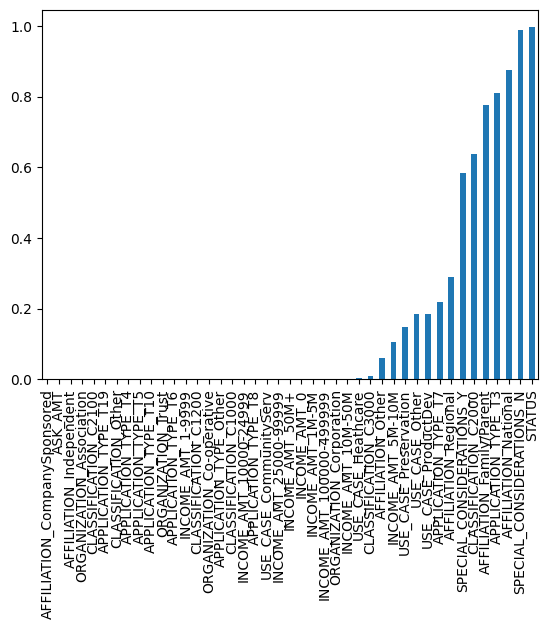

In [60]:
p_values_series.plot.bar()

In [61]:
# Calculate the r2 score for the test data
from sklearn.metrics import r2_score
y_pred = nn.predict(X_test_scaled)
r2_score(y_test, y_pred)


268/268 [==============================] - 1s 2ms/step


0.24627576247590255

In [69]:
#From this, all of the classifications from AFFILIATION_Other to STATUS are not significant. Let's see if removing them makes a difference. 
cleaned_application_df=application_df.drop(["AFFILIATION_Other","INCOME_AMT_5M-10M","USE_CASE_Preservation","USE_CASE_Other","USE_CASE_ProductDev","APPLICATION_TYPE_T7",
                                            "AFFILIATION_Regional","SPECIAL_CONSIDERATIONS_Y","CLASSIFICATION_C2000","AFFILIATION_Family/Parent","APPLICATION_TYPE_T3",
                                            "AFFILIATION_National","SPECIAL_CONSIDERATIONS_N","STATUS"], axis=1)

In [70]:
#For good measure, let's count how many null values are in the dataframe

null_counts=cleaned_application_df.isnull().sum()

null_counts

ASK_AMT                         0
IS_SUCCESSFUL                   0
APPLICATION_TYPE_Other          0
APPLICATION_TYPE_T10            0
APPLICATION_TYPE_T19            0
APPLICATION_TYPE_T4             0
APPLICATION_TYPE_T5             0
APPLICATION_TYPE_T6             0
APPLICATION_TYPE_T8             0
AFFILIATION_CompanySponsored    0
AFFILIATION_Independent         0
CLASSIFICATION_C1000            0
CLASSIFICATION_C1200            0
CLASSIFICATION_C2100            0
CLASSIFICATION_C3000            0
CLASSIFICATION_Other            0
USE_CASE_CommunityServ          0
USE_CASE_Heathcare              0
ORGANIZATION_Association        0
ORGANIZATION_Co-operative       0
ORGANIZATION_Corporation        0
ORGANIZATION_Trust              0
INCOME_AMT_0                    0
INCOME_AMT_1-9999               0
INCOME_AMT_10000-24999          0
INCOME_AMT_100000-499999        0
INCOME_AMT_10M-50M              0
INCOME_AMT_1M-5M                0
INCOME_AMT_25000-99999          0
INCOME_AMT_50M

In [71]:
# Split our preprocessed data into our features and target arrays for cleaned data
y = cleaned_application_df["IS_SUCCESSFUL"].values
X = cleaned_application_df.drop(["IS_SUCCESSFUL"],1).values

# Split the preprocessed data into a training and testing dataset. This time let's set the training set to 80%
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.2, stratify=y)

<ipython-input-71-2e86cb3c7482>:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = cleaned_application_df.drop(["IS_SUCCESSFUL"],1).values


In [72]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [76]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.


nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=29, activation="relu", input_dim=29))


# Second hidden layer
nn.add(tf.keras.layers.Dense(units=58, activation="relu"))

#Third hidden layer

nn.add(tf.keras.layers.Dense(units=20, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_22 (Dense)            (None, 29)                870       
                                                                 
 dense_23 (Dense)            (None, 58)                1740      
                                                                 
 dense_24 (Dense)            (None, 20)                1180      
                                                                 
 dense_25 (Dense)            (None, 1)                 21        
                                                                 
Total params: 3,811
Trainable params: 3,811
Non-trainable params: 0
_________________________________________________________________


In [77]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [78]:
# Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
858/858 [==============================] - 5s 4ms/step - loss: 0.5736 - accuracy: 0.7179
Epoch 2/100
858/858 [==============================] - 3s 4ms/step - loss: 0.5606 - accuracy: 0.7245
Epoch 3/100
858/858 [==============================] - 2s 3ms/step - loss: 0.5583 - accuracy: 0.7268
Epoch 4/100
858/858 [==============================] - 3s 3ms/step - loss: 0.5572 - accuracy: 0.7272
Epoch 5/100
858/858 [==============================] - 2s 3ms/step - loss: 0.5559 - accuracy: 0.7267
Epoch 6/100
858/858 [==============================] - 3s 3ms/step - loss: 0.5549 - accuracy: 0.7281
Epoch 7/100
858/858 [==============================] - 4s 5ms/step - loss: 0.5542 - accuracy: 0.7284
Epoch 8/100
858/858 [==============================] - 3s 4ms/step - loss: 0.5538 - accuracy: 0.7292
Epoch 9/100
858/858 [==============================] - 2s 3ms/step - loss: 0.5530 - accuracy: 0.7293
Epoch 10/100
858/858 [==============================] - 2s 3ms/step - loss: 0.5535 - accura

In [79]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

215/215 - 1s - loss: 0.5542 - accuracy: 0.7356 - 1s/epoch - 5ms/step
Loss: 0.5542334914207458, Accuracy: 0.7355685234069824


In [80]:
# Calculate the r2 score for the test data
from sklearn.metrics import r2_score
y_pred = nn.predict(X_test_scaled)
r2_score(y_test, y_pred)


215/215 [==============================] - 1s 3ms/step


0.25755463826660596

# Small increase in accuracy after removing some of the columns. I think there are still too many features. Will remove more.

#Optimization Attempt #2

In [81]:
# Removing more

cleaned_application_df=cleaned_application_df.drop(["USE_CASE_Heathcare", "ORGANIZATION_Corporation", "INCOME_AMT_10M-50M", "INCOME_AMT_100000-499999", "INCOME_AMT_1M-5M","INCOME_AMT_50M+", "INCOME_AMT_0", "INCOME_AMT_25000-99999",
                                                    "USE_CASE_CommunityServ","CLASSIFICATION_C1000"], axis=1)




In [82]:
# Split our preprocessed data into our features and target arrays for cleaned data
y = cleaned_application_df["IS_SUCCESSFUL"].values
X = cleaned_application_df.drop(["IS_SUCCESSFUL"],1).values

# Split the preprocessed data into a training and testing dataset. This time let's set the training set to 80%
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.2, stratify=y)

<ipython-input-82-2e86cb3c7482>:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = cleaned_application_df.drop(["IS_SUCCESSFUL"],1).values


In [83]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [90]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.


nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=19, activation="relu", input_dim=19))


# Second hidden layer
nn.add(tf.keras.layers.Dense(units=38, activation="relu"))

#Third hidden layer

nn.add(tf.keras.layers.Dense(units=15, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_34 (Dense)            (None, 19)                380       
                                                                 
 dense_35 (Dense)            (None, 38)                760       
                                                                 
 dense_36 (Dense)            (None, 15)                585       
                                                                 
 dense_37 (Dense)            (None, 1)                 16        
                                                                 
Total params: 1,741
Trainable params: 1,741
Non-trainable params: 0
_________________________________________________________________


In [91]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [92]:
# Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
858/858 [==============================] - 3s 3ms/step - loss: 0.5867 - accuracy: 0.7074
Epoch 2/100
858/858 [==============================] - 3s 3ms/step - loss: 0.5709 - accuracy: 0.7199
Epoch 3/100
858/858 [==============================] - 4s 4ms/step - loss: 0.5688 - accuracy: 0.7213
Epoch 4/100
858/858 [==============================] - 3s 4ms/step - loss: 0.5677 - accuracy: 0.7201
Epoch 5/100
858/858 [==============================] - 2s 3ms/step - loss: 0.5675 - accuracy: 0.7209
Epoch 6/100
858/858 [==============================] - 3s 3ms/step - loss: 0.5664 - accuracy: 0.7213
Epoch 7/100
858/858 [==============================] - 3s 4ms/step - loss: 0.5661 - accuracy: 0.7221
Epoch 8/100
858/858 [==============================] - 5s 6ms/step - loss: 0.5660 - accuracy: 0.7223
Epoch 9/100
858/858 [==============================] - 3s 4ms/step - loss: 0.5655 - accuracy: 0.7230
Epoch 10/100
858/858 [==============================] - 3s 3ms/step - loss: 0.5652 - accura

In [93]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

215/215 - 1s - loss: 0.5578 - accuracy: 0.7341 - 890ms/epoch - 4ms/step
Loss: 0.5577759146690369, Accuracy: 0.7341107726097107


In [94]:
# Calculate the r2 score for the test data
from sklearn.metrics import r2_score
y_pred = nn.predict(X_test_scaled)
r2_score(y_test, y_pred)

215/215 [==============================] - 1s 2ms/step


0.2506380507442546

# Accuracy hasn't changed significantly. Will try using keras tuner to see if optimizing hyperparameters will get us a better level of accuracy

In [95]:
#Using keras Tuner to optimize parameters
 # Create a method that creates a new Sequential model with hyperparameter options
def create_model(hp):
    nn_model = tf.keras.models.Sequential()

    # Allow kerastuner to decide which activation function to use in hidden layers
    activation = hp.Choice('activation',['relu','tanh','sigmoid'])
    
     # Set input shape to
    nn_model.add(tf.keras.layers.Input(shape=(19,)))

    # Allow kerastuner to decide number of neurons in first layer
    nn_model.add(tf.keras.layers.Dense(units=hp.Int('first_units',
        min_value=1,
        max_value=50,
        step=5), activation=activation, input_dim=2))

    # Allow kerastuner to decide number of hidden layers and neurons in hidden layers
    for i in range(hp.Int('num_layers', 1, 6)):
        nn_model.add(tf.keras.layers.Dense(units=hp.Int('units_' + str(i),
            min_value=1,
            max_value=60,
            step=5),
            activation=activation))
    
    nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

    # Compile the model
    nn_model.compile(loss="binary_crossentropy", optimizer='adam', metrics=["accuracy"])
    
    return nn_model

In [97]:
 # Import the kerastuner library

import keras_tuner as kt

tuner = kt.Hyperband(
    create_model,
    objective="val_accuracy",
    max_epochs=50,
    hyperband_iterations=2)

In [ ]:
tuner.search(X_train_scaled,y_train,epochs=50,validation_data=(X_test_scaled,y_test))

Trial 141 Complete [00h 01m 43s]
val_accuracy: 0.7357142567634583

Best val_accuracy So Far: 0.7362973690032959
Total elapsed time: 01h 18m 30s

Search: Running Trial #142

Value             |Best Value So Far |Hyperparameter
relu              |relu              |activation
31                |26                |first_units
1                 |4                 |num_layers
21                |36                |units_0
6                 |11                |units_1
6                 |56                |units_2
11                |6                 |units_3
16                |51                |units_4
36                |16                |units_5
50                |50                |tuner/epochs
17                |17                |tuner/initial_epoch
3                 |2                 |tuner/bracket
3                 |2                 |tuner/round
0139              |0069              |tuner/trial_id

Epoch 18/50
858/858 [==============================] - 3s 3ms/step - loss: 0.5644 - a

In [ ]:
top_hyper = tuner.get_best_hyperparameters(3)
for param in top_hyper:
    print(param.values)

In [ ]:
top_model = tuner.get_best_models(3)
for model in top_model:
    model_loss, model_accuracy = model.evaluate(X_test_scaled,y_test,verbose=2)
    print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")